# Logistic Regression Logic

Logistic Regression is a linear model that predicts a binary output variable based on one or more input features. The goal is to find the best-fitting line that separates the two classes.

## Assumptions

* Linearity: The relationship between features and the log-odds of the target variable should be linear.
* Independence: Each observation should be independent of the others.
* Binary target variable: The target variable should be binary (0/1, yes/no, etc.).


In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, confusion_matrix

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(z)
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_approximated = self.sigmoid(z)
        class_predictions = np.where(y_approximated >= 0.6, 1, 0)
        return y_approximated, class_predictions

# # Example usage
# df = pd.DataFrame({
#     'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#     'Feature2': [2, 3, 5, 7, 11, 13, 17, 19, 23, 29],
#     'Target': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
# })

# X = df[['Feature1', 'Feature2']].values
# y = df['Target'].values

# model = LogisticRegression()
# model.fit(X, y)
# predictions, class_predictions = model.predict(X)

# # Visualization
# fig = plt.gcf()
# fig.set_size_inches(fig.get_size_inches() * 1.5)
# ax = plt.gca()
# ax.set_facecolor('olive')

# plt.scatter(df['Feature1'], y, label='Actual', alpha=0.7, color='blue')
# plt.scatter(df['Feature1'], class_predictions, label='Class Predictions', alpha=0.5, color='red')
# plt.scatter(df['Feature1'], predictions, label='Predicted Values', alpha=0.5, color='green')
# plt.xlabel('Feature1')
# plt.ylabel('Target')
# plt.title('Logistic Regression')
# plt.legend()
# plt.show()

In [143]:
# Example usage
df = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 3, 5, 7, 11, 13, 17, 19, 23, 29],
    'Target': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})

X = df[['Feature1', 'Feature2']].values
y = df['Target'].values

model = LogisticRegression()
model.fit(X, y)
predictions, class_predictions = model.predict(X)

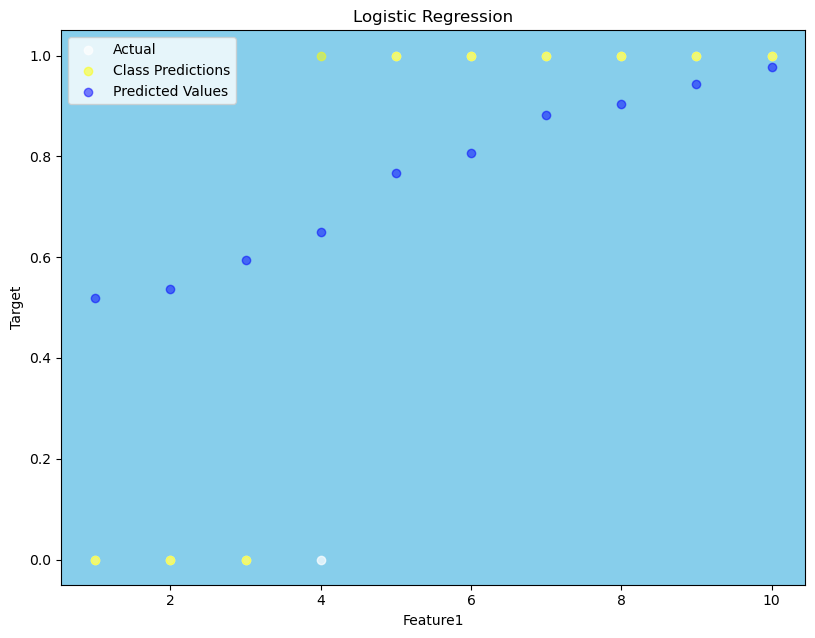

In [144]:
# Visualization
fig = plt.gcf()
fig.set_size_inches(fig.get_size_inches() * 1.5)
ax = plt.gca()
ax.set_facecolor('skyblue')

plt.scatter(df['Feature1'], y, label='Actual', alpha=0.7, color='white')
plt.scatter(df['Feature1'], class_predictions, label='Class Predictions', alpha=0.5, color='yellow')
plt.scatter(df['Feature1'], predictions, label='Predicted Values', alpha=0.5, color='blue')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('Logistic Regression')
plt.legend()
plt.show()

In [145]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Define the Logistic Regression class
class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        # Initialize the learning rate and number of iterations
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        # Initialize the weights and bias
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        # Define the sigmoid function
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Train the model
        num_samples, num_features = X.shape
        # Initialize the weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            # Calculate the predicted values
            z = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(z)
            # Calculate the gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)
            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_approximated = self.sigmoid(z)
        class_predictions = np.where(y_approximated < 0.6, 0, np.where(y_approximated >= 0.6, 1, 0))
        return y_approximated, class_predictions


In [146]:
# Example usage
df = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 3, 5, 7, 11, 13, 17, 19, 23, 29],
    'Target': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})

X = df[['Feature1', 'Feature2']].values
y = df['Target'].values

# Hyperparameter tuning
learning_rates = [0.001, 0.01, 0.1]
num_iterations = [500, 1000, 2000]
best_auc = 0
best_lr = 0
best_iter = 0

for lr in learning_rates:
    for iter in num_iterations:
        # Train model with current hyperparameters
        model = LogisticRegression(learning_rate=lr, num_iterations=iter)
        model.fit(X, y)
        predictions, class_predictions = model.predict(X)
        # Calculate the ROC AUC score
        auc = roc_auc_score(y, predictions)
        # Update the best hyperparameters
        if auc > best_auc:
            best_auc = auc
            best_lr = lr
            best_iter = iter

print(f"Best AUC: {best_auc}, Best Learning Rate: {best_lr}, Best Iterations: {best_iter}")

# Train model with best hyperparameters
model = LogisticRegression(learning_rate=best_lr, num_iterations=best_iter)
model.fit(X, y)
predictions, class_predictions = model.predict(X)



Best AUC: 1.0, Best Learning Rate: 0.001, Best Iterations: 500


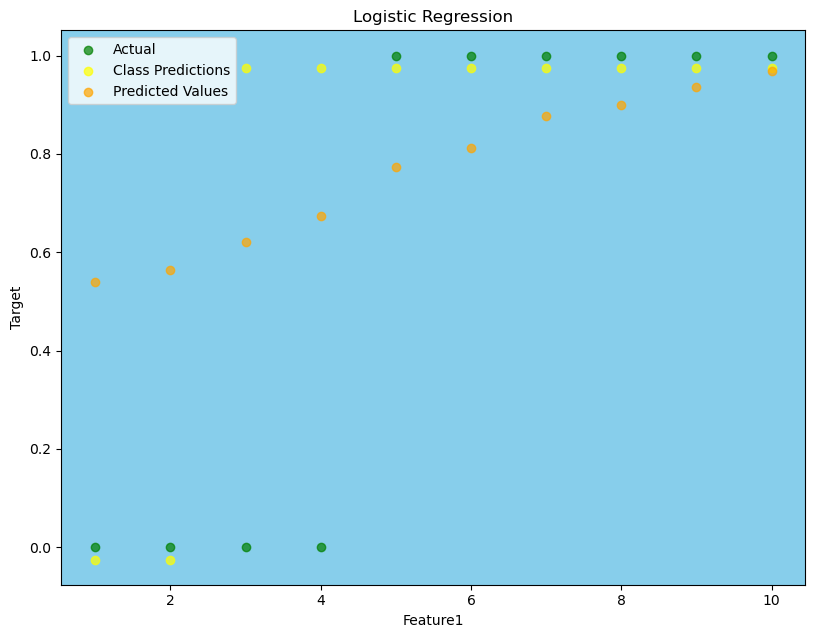

In [147]:
# Visualization
fig = plt.gcf()
fig.set_size_inches(fig.get_size_inches() * 1.5)
ax = plt.gca()
ax.set_facecolor('skyblue')

plt.scatter(df['Feature1'], y, label='Actual', alpha=0.7, color='green')
plt.scatter(df['Feature1'], class_predictions-0.025, label='Class Predictions', alpha=0.7, color='yellow')
plt.scatter(df['Feature1'], predictions, label='Predicted Values', alpha=0.7, color='orange')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('Logistic Regression')
plt.legend()
plt.show()

In [148]:
# Confusion matrix
conf_mat = confusion_matrix(y, class_predictions)
print("Confusion Matrix:")
print(conf_mat)


Confusion Matrix:
[[2 2]
 [0 6]]


In [149]:
# F1-score
f1 = f1_score(y, class_predictions)
print("F1 Score:", f1)


F1 Score: 0.8571428571428571


### Optimization of score

Best AUC: 1.0, Best Learning Rate: 0.001, Best Iterations: 500


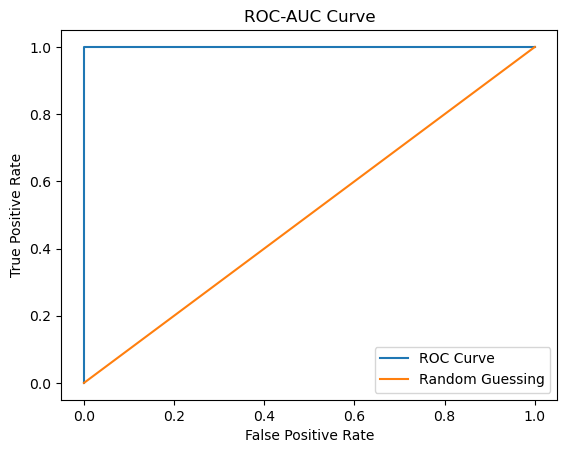

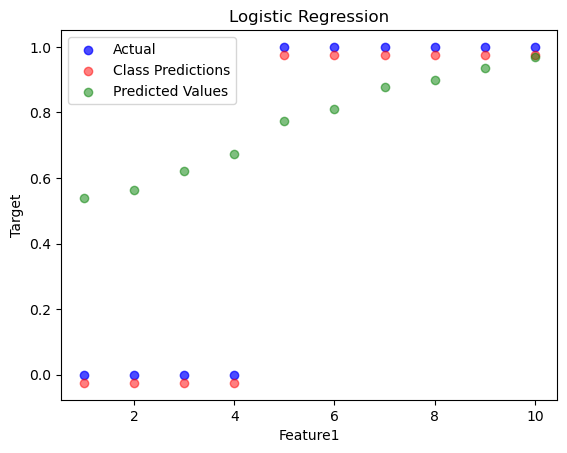

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve

class LogisticRegression:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(z)
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_approximated = self.sigmoid(z)
        class_predictions = np.where(y_approximated >= 0.75, 1, 0)
        return y_approximated, class_predictions

# Example usage
df = pd.DataFrame({
    'Feature1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Feature2': [2, 3, 5, 7, 11, 13, 17, 19, 23, 29],
    'Target': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})

X = df[['Feature1', 'Feature2']].values
y = df['Target'].values

# Hyperparameter tuning
learning_rates = [0.001, 0.01, 0.1]
num_iterations = [500, 1000, 2000]
best_auc = 0
best_lr = 0
best_iter = 0

for lr in learning_rates:
    for iter in num_iterations:
        model = LogisticRegression(learning_rate=lr, num_iterations=iter)
        model.fit(X, y)
        predictions, class_predictions = model.predict(X)
        auc = roc_auc_score(y, predictions)
        if auc > best_auc:
            best_auc = auc
            best_lr = lr
            best_iter = iter

print(f"Best AUC: {best_auc}, Best Learning Rate: {best_lr}, Best Iterations: {best_iter}")

# Train model with best hyperparameters
model = LogisticRegression(learning_rate=best_lr, num_iterations=best_iter)
model.fit(X, y)
predictions, class_predictions = model.predict(X)

# Plot ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y, predictions)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

# Scatter plot visualization of predicted and actual output
plt.scatter(df['Feature1'], y, label='Actual', alpha=0.7, color='blue')
plt.scatter(df['Feature1'], class_predictions-0.025, label='Class Predictions', alpha=0.5, color='red')
plt.scatter(df['Feature1'], predictions, label='Predicted Values', alpha=0.5, color='green')
plt.xlabel('Feature1')
plt.ylabel('Target')
plt.title('Logistic Regression')
plt.legend()
plt.show()

In [151]:
# Confusion matrix
conf_mat = confusion_matrix(y, class_predictions)
print("Confusion Matrix:")
print(conf_mat)


Confusion Matrix:
[[4 0]
 [0 6]]


In [152]:
# F1-score
f1 = f1_score(y, class_predictions)
print("F1 Score:", f1)


F1 Score: 1.0


In [153]:
### Further Optimization of f1-score

In [154]:
# Get false positive rates, true positive rates, and thresholds
fpr, tpr, thresholds = roc_curve(y, predictions)

# Initialize best F1 score and best threshold
best_f1 = 0
best_threshold = 0

# Iterate over thresholds to find the best one
for i in range(len(thresholds)):
    # Get class predictions for current threshold
    class_predictions = np.where(predictions >= thresholds[i], 1, 0)
    
    # Calculate F1 score for current threshold
    f1 = f1_score(y, class_predictions)
    
    # Update best F1 score and best threshold if current F1 score is better
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresholds[i]

print(f"Best F1 Score: {best_f1}, Best Threshold: {best_threshold}")

# Use best threshold to get final class predictions
final_class_predictions = np.where(predictions >= best_threshold, 1, 0)

Best F1 Score: 1.0, Best Threshold: 0.7727052078806278


In [155]:
# Confusion matrix
conf_mat = confusion_matrix(y, final_class_predictions)
print("Confusion Matrix:")
print(conf_mat)


Confusion Matrix:
[[4 0]
 [0 6]]


In [156]:
# F1-score
f1 = f1_score(y, final_class_predictions)
print("F1 Score:", f1)


F1 Score: 1.0
